In [1]:
#@title Ingrese valores de X e Y
_x = "0,2.6,7" #@param {type:"string"}
_y = "0,3.4,0" #@param {type:"string"}

try:
  _x = list(_x.split(','))
  _y = list(_y.split(','))
  _x = [float(i) for i in _x]
  _y = [float(i) for i in _y]
except Exception as e:
  print("Ocurrió un un error: ", e)
else:
  print("Datos ingresados correctamente")



Datos ingresados correctamente


In [2]:
import pandas as pd
import numpy as np
from math import *
import sympy as sym
import matplotlib.pyplot as plt

tabla = pd.DataFrame({
    'valores X':_x,
    'valores Y':_y
})
tabla

,valores X,valores Y
0,0.0,0.0
1,2.6,3.4
2,7.0,0.0


In [3]:
def interpolacion_lagrange(tabla,min=None,max=None):
  n = len(tabla)
  x = sym.Symbol('x')
  MAX = max
  MIN = min
  Pi = 0
  for i in range(0,n):
    #para lagrange 
    numerador = 1
    denominador = 1
    for j in range(0,n):
      if(j != i):
         numerador = numerador * (x - tabla['valores X'][j])
         denominador = denominador * (tabla['valores X'][i] - tabla['valores X'][j])
    Li = numerador/denominador

    Pi = Pi + Li*tabla['valores Y'][i]
    

  polinomio_simplificado = Pi.expand()
  Px = sym.lambdify(x,polinomio_simplificado)

  #evaluacion [a,b]
  iterador = 100
  if MIN == None and MAX == None:
    a = np.min(tabla['valores X'])
    b = np.max(tabla['valores X'])
  else:
    a = MIN
    b = MAX
  dominio = np.linspace(a,b,iterador)
  imagenes = Px(dominio)


  print('Polinomio de Lagrange:')
  print(Pi)
  print()
  print('Polinomio de Lagrange redusido: ')
  print(polinomio_simplificado)
  
  # Gráfica
  plt.plot(dominio,imagenes, label = 'Polinomio de salida')
  plt.legend()
  plt.xlabel('Xi')
  plt.ylabel('Yi')
  plt.title('Interpolación Lagrange')
  plt.show()




Polinomio de Lagrange:
-0.297202797202797*x*(x - 7.0)

Polinomio de Lagrange redusido: 
-0.297202797202797*x**2 + 2.08041958041958*x


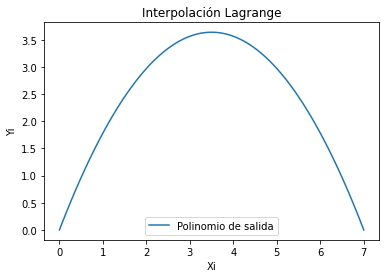

In [4]:
interpolacion_lagrange(tabla)